# 数据来源：NCEP/NCAR 月平均的位势高度场
# 实习要求
(1)计算1980-2010年（30年）7月850 hPa 的平均高度场，绘制环流平均图；
(2)计算2010年7月850 hPa 的高度距平，绘制高度距平场图（相对于1980-2010年共30年的平均)；
(3)计算2010年7月850 hPa 的高度场纬偏值，绘制环流纬偏图。

In [1]:
# 导入需要用到的库
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
from matplotlib.ticker import MultipleLocator

plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  ###用来正常显示负号

In [2]:
# 创建地图函数
def createmap():
    proj = ccrs.PlateCarree(central_longitude=180)
    fig = plt.figure(figsize=(9, 6))
    ax = fig.subplots(1, 1, subplot_kw={'projection': proj})
    # 海岸线
    ax.coastlines('110m')
    # 标注坐标轴
    ax.set_xticks(np.arange(-180, 181, 30), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    # 设置大小刻度
    minorticks = MultipleLocator(10)
    majorticks = MultipleLocator(30)
    ax.xaxis.set_major_locator(majorticks)
    ax.xaxis.set_minor_locator(minorticks)
    ax.yaxis.set_minor_locator(minorticks)
    # 经纬度格式，把0经度设置不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    return ax, fig

In [3]:
ds = xr.open_dataset('D:\WORKcode\DuanQiQiHou\data\hgt.mon.mean.nc')['hgt']
ds

<xarray.DataArray 'hgt' (time: 855, level: 17, lat: 73, lon: 144)>
[152791920 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2019-03-01
Attributes:
    long_name:     Monthly mean geopotential height
    valid_range:   [ -700. 35000.]
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    var_desc:      Geopotential height
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ -354.45834 32321.098  ]

In [4]:
lat = ds['lat']
lon = ds['lon']

In [5]:
ds1 = ds.loc[ds.time.dt.month.isin([7])].loc["1980-01-01":'2010-12-01', 850, :, :]

In [6]:
ds1

<xarray.DataArray 'hgt' (time: 31, lat: 73, lon: 144)>
[325872 values with dtype=float32]
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1980-07-01 1981-07-01 ... 2010-07-01
Attributes:
    long_name:     Monthly mean geopotential height
    valid_range:   [ -700. 35000.]
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    var_desc:      Geopotential height
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ -354.45834 32321.098  ]

In [7]:
avehgt850 = ds1.mean(dim='time')
avehgt850

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[1377.1571, 1377.1571, 1377.1571, ..., 1377.1571, 1377.1571,
        1377.1571],
       [1379.7501, 1379.7429, 1379.7438, ..., 1379.7212, 1379.7356,
        1379.7336],
       [1384.7316, 1384.7471, 1384.7336, ..., 1384.9095, 1384.8129,
        1384.7576],
       ...,
       [1332.029 , 1339.7421, 1347.1458, ..., 1307.742 , 1315.9937,
        1324.1195],
       [1343.6171, 1347.329 , 1351.0156, ..., 1332.2048, 1336.0272,
        1339.8408],
       [1330.0614, 1330.0614, 1330.0614, ..., 1330.0614, 1330.0614,
        1330.0614]], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [8]:
print(avehgt850.max(),avehgt850.min())

<xarray.DataArray 'hgt' ()>
array(1616.3560791)
Coordinates:
    level    float32 850.0 <xarray.DataArray 'hgt' ()>
array(1047.05310059)
Coordinates:
    level    float32 850.0


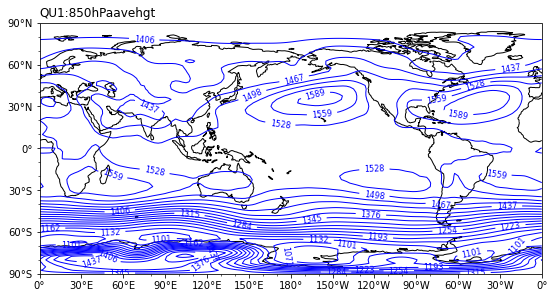

In [9]:
ax,fig = createmap()
avehgt850data,lon1=add_cyclic_point(avehgt850,coord=lon)
denglines = ax.contour(lon1, lat, avehgt850data,levels=np.linspace(1040,1620,20), colors='blue',linewidths=1,transform=ccrs.PlateCarree())
plt.clabel(denglines, inline=True, fontsize=8, fmt='%.0f')
ax.set_title('QU1:850hPaavehgt',loc='left')
plt.savefig('D:\\WORKcode\\DuanQiQiHou\\data\\1.png')


In [10]:
hgt850_7=ds1.loc['2010-07-01']
hgt850_7

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[1310.871 , 1310.871 , 1310.871 , ..., 1310.871 , 1310.871 , 1310.871 ],
       [1332.742 , 1332.2903, 1332.1613, ..., 1333.3226, 1333.1936, 1332.9032],
       [1354.5807, 1354.4517, 1354.129 , ..., 1355.4193, 1355.0968, 1354.871 ],
       ...,
       [1293.7097, 1301.    , 1307.742 , ..., 1269.4193, 1277.871 , 1285.9354],
       [1277.9354, 1281.4193, 1284.8064, ..., 1266.8064, 1270.6451, 1274.3871],
       [1233.3549, 1233.3549, 1233.3549, ..., 1233.3549, 1233.3549, 1233.3549]],
      dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2010-07-01
Attributes:
    long_name:     Monthly mean geopotential height
    valid_range:   [ -700. 35000.]
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    var_desc:      Geopotential height
    level_desc:    Multiple levels
    statistic:     Mean
    parent_stat:   Other
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ -354.45834 32321.098  ]

In [11]:
juping_hgt850_7=hgt850_7-avehgt850
juping_hgt850_7

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[-66.28613 , -66.28613 , -66.28613 , ..., -66.28613 , -66.28613 ,
        -66.28613 ],
       [-47.00818 , -47.452637, -47.58252 , ..., -46.39856 , -46.541992,
        -46.830444],
       [-30.150879, -30.29541 , -30.604614, ..., -29.490234, -29.716064,
        -29.886597],
       ...,
       [-38.319336, -38.742065, -39.40381 , ..., -38.32263 , -38.12268 ,
        -38.184082],
       [-65.68164 , -65.90967 , -66.20923 , ..., -65.39844 , -65.38208 ,
        -65.453735],
       [-96.70654 , -96.70654 , -96.70654 , ..., -96.70654 , -96.70654 ,
        -96.70654 ]], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2010-07-01

In [12]:
print(juping_hgt850_7.max(),juping_hgt850_7.min())

<xarray.DataArray 'hgt' ()>
array(80.37451172)
Coordinates:
    level    float32 850.0
    time     datetime64[ns] 2010-07-01 <xarray.DataArray 'hgt' ()>
array(-136.44232178)
Coordinates:
    level    float32 850.0
    time     datetime64[ns] 2010-07-01


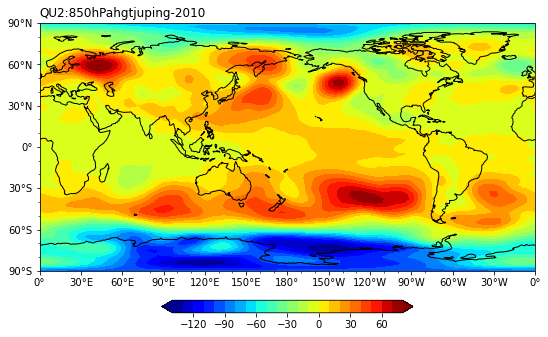

In [13]:
ax,fig = createmap()
juping_hgt850_7data,lon2=add_cyclic_point(juping_hgt850_7,coord=lon)
colorbar = ax.contourf(lon2, lat, juping_hgt850_7data, levels=np.arange(-140, 82, 10), cmap='jet',extend='both',transform=ccrs.PlateCarree())
cb=plt.colorbar(colorbar,location='bottom',shrink=0.5,pad=0.09,extendfrac='auto')
ax.set_title('QU2:850hPahgtjuping-2010',loc='left')
plt.savefig('D:\\WORKcode\\DuanQiQiHou\\data\\2.png')

In [14]:
avehgt850_lat=hgt850_7.mean(dim='lon')
avehgt850_lat

<xarray.DataArray 'hgt' (lat: 73)>
array([1310.871 , 1315.7887, 1328.9052, 1346.5044, 1364.927 , 1382.2047,
       1398.0181, 1412.3372, 1424.6534, 1434.239 , 1441.2994, 1447.092 ,
       1452.9282, 1459.2305, 1466.2556, 1474.8717, 1485.8245, 1498.3224,
       1510.2476, 1520.183 , 1528.2036, 1534.4612, 1538.2502, 1538.9152,
       1537.0365, 1533.7607, 1529.5365, 1524.5875, 1519.8325, 1516.5061,
       1514.8721, 1514.3643, 1514.5093, 1515.0592, 1515.3298, 1514.7812,
       1513.9834, 1514.1584, 1515.6595, 1518.1029, 1521.6573, 1527.0269,
       1533.9861, 1541.2206, 1547.6346, 1552.9462, 1556.4626, 1556.6411,
       1552.3755, 1543.7234, 1530.7854, 1512.8986, 1489.6393, 1461.4891,
       1428.9061, 1391.523 , 1349.255 , 1303.0013, 1253.8483, 1202.6337,
       1151.2847, 1104.3123, 1068.6637, 1052.5883, 1062.0663, 1093.6743,
       1130.4236, 1152.0508, 1155.1166, 1158.6168, 1181.5869, 1216.2684,
       1233.3549], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
    time     datetime64[ns] 2010-07-01

In [15]:
weipianzhi=hgt850_7-avehgt850_lat
weipianzhi

<xarray.DataArray 'hgt' (lat: 73, lon: 144)>
array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [ 16.953247,  16.501587,  16.372559, ...,  17.533936,  17.404907,
         17.114502],
       [ 25.675537,  25.546509,  25.223877, ...,  26.51416 ,  26.19165 ,
         25.96582 ],
       ...,
       [112.1228  , 119.413086, 126.15503 , ...,  87.8324  ,  96.28406 ,
        104.34851 ],
       [ 61.666992,  65.15088 ,  68.537964, ...,  50.537964,  54.37671 ,
         58.118652],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)
Coordinates:
    level    float32 850.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] 2010-07-01

In [16]:
print(weipianzhi.max(),weipianzhi.min())

<xarray.DataArray 'hgt' ()>
array(245.54418945)
Coordinates:
    level    float32 850.0
    time     datetime64[ns] 2010-07-01 <xarray.DataArray 'hgt' ()>
array(-223.95397949)
Coordinates:
    level    float32 850.0
    time     datetime64[ns] 2010-07-01


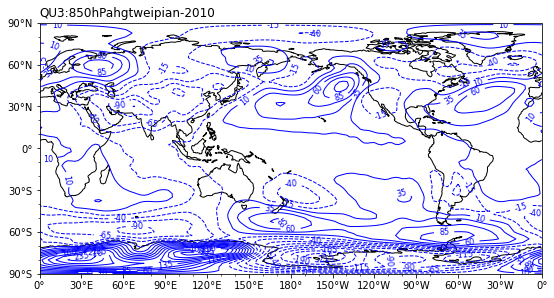

In [20]:
ax,fig = createmap()
weipianzhidata,lon3=add_cyclic_point(weipianzhi,coord=lon)
denglines = ax.contour(lon3, lat, weipianzhidata, levels=np.arange(-240, 250, 25), colors='blue',linewidths=1,transform=ccrs.PlateCarree())
plt.clabel(denglines, inline=True, fontsize=8, fmt='%.0f')
ax.set_title('QU3:850hPahgtweipian-2010',loc='left')
plt.savefig('D:\\WORKcode\\DuanQiQiHou\\data\\3.png')